In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader as api

In [ ]:
df = pd.read_csv('/content/Twitter_Data.csv')
df


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
nan_rows = df[df['category'].isnull()]
print(nan_rows)
df = df.dropna()
nan_row = df[df['clean_text'].isnull()]
print(nan_row)

                                               clean_text  category
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
159442               chidambaram gives praises modinomics       NaN
160559  the reason why modi contested from seats 2014 ...       NaN
Empty DataFrame
Columns: [clean_text, category]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split
x = df['clean_text']
y = df['category']
print(x)
print(y)
print(x[0])


0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object
0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162969, dtype: float64
when modi promised “minimum government maximum governance” expected him begin the difficult

**PREPROCESSING**

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
'''data_pos = x[y == 1.0]
data_neg = x[y == -1.0]
data_neu = x[y==0.0]
print(data_neg)'''
import re
df['clean_text']=df['clean_text'].str.lower()
df.tail()

<ipython-input-6-27249f405207>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].str.lower()


,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


**STOPWORDS** **REMOVAL**

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words = ['too','below','will', 'about', 'there', 'before', 've', 'once', 'doing',  'do', "she's", 'o', 'because', 'should', 'll', 'while',  'did', 'me', 'off', 'more', 'only', 'from', 'myself', 'having', 'when', 'i', 'their',  'you', 'am', 'with', 'but', 'itself', 'to', 'is', 'my', 'was', 'up', 'same', 'in', 'she', 'an', 'any', 'both', 'no', 'on', 'here', 'd', 'down',  'them', 'can', 'into', 'how', 'between','which', 'a', 'then', 'where','has', 'through', 'just', 'further', 'as', 'those', 'theirs', 'yourself', 'who', 'your', 'so', 'we', 't', 'her', 'if', 'whom', 'this', 'during', 'y', 'now', 's', 'does', 'been', 'very', 'by', "you'd", "you're", 'other', 're', 'its', 'at', 'have', 'these', 'be', 'him',  'm', 'such', 'himself', 'ma', 'that', 'yours', 'are', 'again', 'and', 'they', "should've", 'were',  'yourselves', 'some', 'ours', 'hers', 'it','for', 'own', 'each', 'most', 'what', 'herself', 'being', "you've", 'after', "that'll", 'out', 'above', 'than', 'won', 'of',  'he', 'all', "you'll", 'his', 'themselves', 'under', 'our', 'ourselves', 'over', 'why', 'the', "it's", 'had', 'or']


In [ ]:
def removing_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['clean_text'] = df['clean_text'].apply(lambda text: removing_stopwords(text))
df['clean_text'].head()

<ipython-input-10-c8ad1fee642b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda text: removing_stopwords(text))


0    modi promised “minimum government maximum gove...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object

**Removing othet language wors**

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,045 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,674 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://

In [ ]:
import enchant
d = enchant.Dict("en_US")

In [ ]:
def removing_nonEnglish(text):
    return " ".join([word for word in str(text).split() if d.check(word)])
df['clean_text'] = df['clean_text'].apply(lambda text: removing_nonEnglish(text))
df['clean_text'].head()

<ipython-input-13-e5d7ffc6253a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda text: removing_nonEnglish(text))


0    promised government maximum expected begin dif...
1                    talk nonsense continue drama vote
2    say vote welcome told main campaigner think relax
3    asking supporters prefix names great service c...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object

In [ ]:
'''import re

#text = "Hello! 😀👋 How are you? 🙏🏼😊"

# Define a regular expression pattern that matches emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Use the findall method of the re module to find all matches of the pattern in the text
def findEmo(text):
    emojis = emoji_pattern.findall(text)
    if(len(emojis)!=0):
      print(emojis)
df['clean_text'] = df['clean_text'].apply(lambda text:findEmo(text) )'''

# Print the list of emojis found in the text

'import re\n\n#text = "Hello! 😀👋 How are you? 🙏🏼😊"\n\n# Define a regular expression pattern that matches emojis\nemoji_pattern = re.compile("["\n                           u"😀-🙏"  # emoticons\n                           u"🌀-🗿"  # symbols & pictographs\n                           u"🚀-\U0001f6ff"  # transport & map symbols\n                           u"\U0001f1e0-🇿"  # flags (iOS)\n                           "]+", flags=re.UNICODE)\n\n# Use the findall method of the re module to find all matches of the pattern in the text\ndef findEmo(text):\n    emojis = emoji_pattern.findall(text)\n    if(len(emojis)!=0):\n      print(emojis)\ndf[\'clean_text\'] = df[\'clean_text\'].apply(lambda text:findEmo(text) )'

**Tokenization**

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
df['clean_text'] = df['clean_text'].apply(tweet_tokenizer.tokenize)
df['clean_text'].head()

<ipython-input-15-a02906b62e2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(tweet_tokenizer.tokenize)


0    [promised, government, maximum, expected, begi...
1              [talk, nonsense, continue, drama, vote]
2    [say, vote, welcome, told, main, campaigner, t...
3    [asking, supporters, prefix, names, great, ser...
4    [answer, among, powerful, world, leader, today...
Name: clean_text, dtype: object

**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatizer_on_text(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))
df['clean_text'].head()

<ipython-input-17-f316151f1e4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))


0    [promised, government, maximum, expected, begi...
1              [talk, nonsense, continue, drama, vote]
2    [say, vote, welcome, told, main, campaigner, t...
3    [asking, supporters, prefix, names, great, ser...
4    [answer, among, powerful, world, leader, today...
Name: clean_text, dtype: object

**Split into Train and Test**

In [ ]:
print("Neutral:",df.category.value_counts()[0])
print("Positive:",df.category.value_counts()[1])
print("Negative:",df.category.value_counts()[-1])
print("Neutral: ", df.category.value_counts()[0]/len(df)*100,"%")
print("Negative: ", df.category.value_counts()[-1]/len(df)*100,"%")
print("Positive: ", df.category.value_counts()[1]/len(df)*100,"%")

Neutral: 55211
Positive: 72249
Negative: 35509
Neutral:  33.87822223858525 %
Negative:  21.78880646012432 %
Positive:  44.33297130129043 %


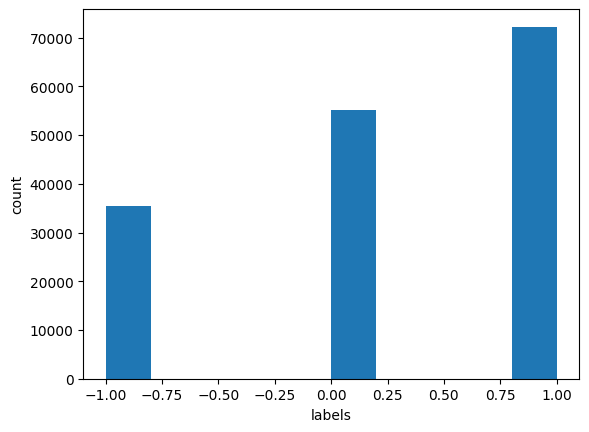

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['category'])
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [ ]:
from sklearn.utils import resample

df_majority = df[(df['category']==1)]
df_minority = df[(df['category']==-1)]
df_minority1 = df[(df['category']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 72249,
                                 random_state=42)
df_minority_upsampled1 = resample(df_minority1,
                                 replace=True,
                                 n_samples= 72249,
                                 random_state=42)

df_upsampled = pd.concat([df_minority_upsampled,df_minority_upsampled1, df_majority])
print("Neutral:",df_upsampled.category.value_counts()[0])
print("Positive:",df_upsampled.category.value_counts()[1])
print("Negative:",df_upsampled.category.value_counts()[-1])

Neutral: 72249
Positive: 72249
Negative: 72249


In [ ]:
x=df_upsampled.clean_text
y=df_upsampled.category

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=10,shuffle = True)

In [ ]:
x_test

52212     [joined, elite, club, space, powers, shooting,...
63052     [citizens, support, new, fighting, corruption,...
49226     [shoots, satellite, missile, test, joining, sp...
80540                                          [scientists]
97289     [difference, speeches, 2014, 2019, time, tryin...
                                ...                        
81268              [2014, back, speech, going, troll, king]
120552    [clue, sounds, pro, taking, gas, connections, ...
92691     [hope, done, leaders, like, well, not, hope, s...
65816     [chief, giving, govt, truth, mission, politics...
103991                   [expect, guru, gives, clean, chit]
Name: clean_text, Length: 65025, dtype: object

In [ ]:
y_test

52212     1.0
63052     1.0
49226     1.0
80540     0.0
97289    -1.0
         ... 
81268     0.0
120552    1.0
92691    -1.0
65816     0.0
103991    1.0
Name: category, Length: 65025, dtype: float64

# Feature Extraction

**TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range = (2,2))
x_train_str = [' '.join(doc) for doc in x_train]
tfidf_x_train = tfidf_vectorizer.fit_transform(x_train_str)
x_test_str = [' '.join(doc) for doc in x_test]
tfidf_x_test = tfidf_vectorizer.transform(x_test_str)
tfidf_values = tfidf_x_train.toarray()
#emoji_matrix = get_emoji_embedding_matrix(x_train)
#X_combined = np.concatenate((tfidf_x_train.toarray(), emoji_matrix), axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

**BNB Model**

In [ ]:
l=[]

In [ ]:

alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2]

In [ ]:
BNBmodel = BernoulliNB(alpha = 0.1)
BNBmodel.fit(tfidf_x_train, y_train)
y_pred = BNBmodel.predict(tfidf_x_test)
print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

'''sns.heatmap(cf_matrix, annot = labels.flatten(), cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
print(y_pred)'''


              precision    recall  f1-score   support

        -1.0       0.88      0.82      0.85     21615
         0.0       0.68      0.94      0.79     21617
         1.0       0.84      0.58      0.69     21793

    accuracy                           0.78     65025
   macro avg       0.80      0.78      0.78     65025
weighted avg       0.80      0.78      0.77     65025



'sns.heatmap(cf_matrix, annot = labels.flatten(), cmap = \'Blues\',fmt = \'\',xticklabels = categories, yticklabels = categories)\nplt.xlabel("Predicted values", fontdict = {\'size\':14}, labelpad = 10)\nplt.ylabel("Actual values" , fontdict = {\'size\':14}, labelpad = 10)\nplt.title ("Confusion Matrix", fontdict = {\'size\':18}, pad = 20)\nprint(y_pred)'

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7793617839292579


Text(0.5, 1.0, 'Tuning alpha parameter in BNB Model')

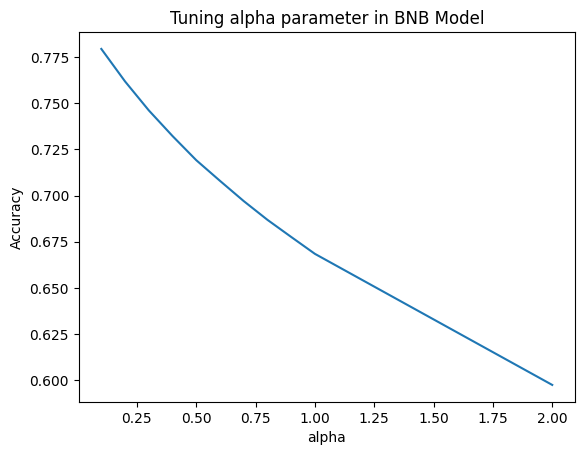

In [ ]:
plt.plot(alpha,l)
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Tuning alpha parameter in BNB Model")

**MNB Model**

In [ ]:
#l=[]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(tfidf_x_train, y_train)
y_pred = mnb.predict(tfidf_x_test)
print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

        -1.0       0.70      0.89      0.78     21615
         0.0       0.82      0.71      0.76     21617
         1.0       0.80      0.69      0.74     21793

    accuracy                           0.76     65025
   macro avg       0.77      0.76      0.76     65025
weighted avg       0.77      0.76      0.76     65025

0.7643521722414456


In [ ]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.8,0.9,1]

In [ ]:
print(l)

[0.7643521722414456, 0.7610765090349866, 0.7583083429450211, 0.7566628219915417, 0.7545251826220685, 0.7531410995770857, 0.7512341407151095, 0.750080738177624, 0.7492195309496348, 0.748081507112649]


Text(0.5, 1.0, 'Tuning alpha parameter in BNB model')

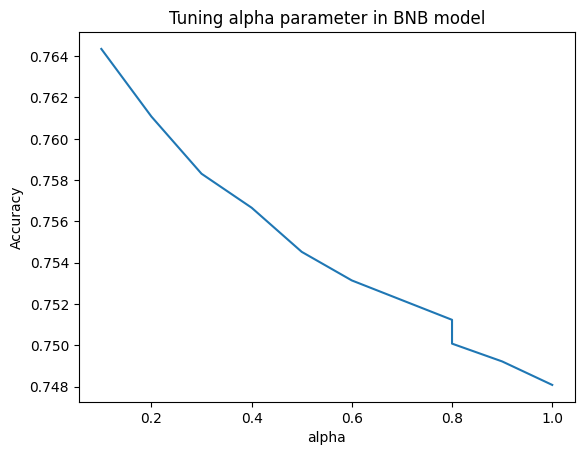

In [ ]:
plt.plot(alpha,l)
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Tuning alpha parameter in BNB model")

**SVC Model**

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(tfidf_x_train, y_train)
y_pred1 = SVCmodel.predict(tfidf_x_test)
print(classification_report(y_test, y_pred1))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


              precision    recall  f1-score   support

        -1.0       0.86      0.88      0.87     21615
         0.0       0.76      0.88      0.81     21617
         1.0       0.82      0.68      0.75     21793

    accuracy                           0.81     65025
   macro avg       0.81      0.81      0.81     65025
weighted avg       0.81      0.81      0.81     65025



In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

0.8119338715878508


Text(0.5, 1.0, 'Accuracy for different models')

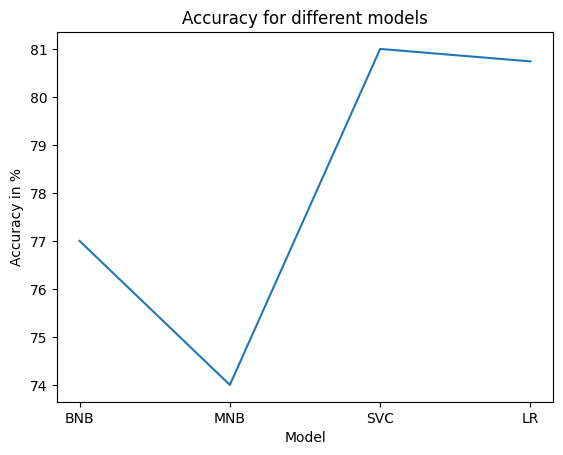

In [ ]:
x=['BNB','MNB','SVC','LR']
y=[77,74,81,80.74]
plt.plot(x,y)
plt.xlabel("Model")
plt.ylabel("Accuracy in %")
plt.title("Accuracy for different models")

**LR Model**

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(tfidf_x_train, y_train)
y_pred2 = LRmodel.predict(tfidf_x_test)
print(classification_report(y_test, y_pred2))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

              precision    recall  f1-score   support

        -1.0       0.85      0.87      0.86     21615
         0.0       0.76      0.87      0.81     21617
         1.0       0.81      0.68      0.74     21793

    accuracy                           0.81     65025
   macro avg       0.81      0.81      0.81     65025
weighted avg       0.81      0.81      0.81     65025



In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)

0.8074586697424068


In [ ]:
print("Enter the Tweet")
ip = input()
ip = removing_stopwords(ip)
ip = tweet_tokenizer.tokenize(ip)
ip = lemmatizer_on_text(ip)
ip = ' '.join(ip)
ip = [ip]
tfidf_ip = tfidf_vectorizer.transform(ip)
YBNB = BNBmodel.predict(tfidf_ip)
print(YBNB)
print('Prediction by BNB Model')
if(YBNB[0]==1.):
  print('Positive')
elif(YBNB[0]==0.0):
  print('Neutral')
else:
  print('Negative')

YSVC = SVCmodel.predict(tfidf_ip)
print(YSVC)
print('Prediction by SVC Model')
if(YSVC[0]==1.):
  print('Positive')
elif(YSVC[0]==0.0):
  print('Neutral')
else:
  print('Negative')

YLR = LRmodel.predict(tfidf_ip)
print(YLR)
print('Prediction by LR Model')
if(YLR[0]==1.):
  print('Positive')
elif(YLR[0]==0.0):
  print('Neutral')
else:
  print('Negative')

Enter the Tweet
I am not good
[0.]
Prediction by BNB Model
Neutral
[-1.]
Prediction by SVC Model
Negative
[-1.]
Prediction by LR Model
Negative


In [ ]:
YBNB = BNBmodel.predict(tfidf_ip)
print(YBNB)
print('Prediction by BNB Model')
if(YBNB[0]==1.):
  print('Positive')
elif(YBNB[0]==0.0):
  print('Neutral')
else:
  print('Negative')

[1.]
Prediction by BNB Model
Positive


In [ ]:
YSVC = SVCmodel.predict(tfidf_ip)
print(YSVC)
print('Prediction by SVC Model')
if(YSVC[0]==1.):
  print('Positive')
elif(YSVC[0]==0.0):
  print('Neutral')
else:
  print('Negative')

[1.]
Prediction by SVC Model
Positive


In [ ]:
YLR = LRmodel.predict(tfidf_ip)
print(YLR)
print('Prediction by LR Model')
if(YLR[0]==1.):
  print('Positive')
elif(YLR[0]==0.0):
  print('Neutral')
else:
  print('Negative')

[1.]
Prediction by LR Model
Positive
